<h3><b> Chapter 9: Support Vector Machines </b></h3>

In [128]:
# Libraries
import numpy as np
import pandas as pd
import sklearn.model_selection as skm

from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import subplots, cm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler

<b> Q4 </b>

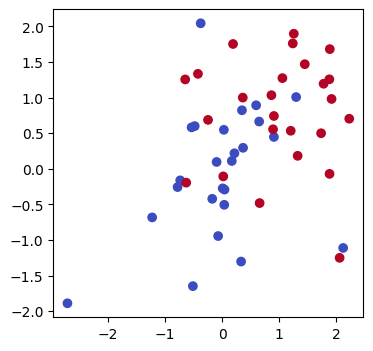

In [2]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1] * 25 + [1] * 25)
X[y==1] += 1
fig, ax = subplots(figsize=(4, 4))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm);

Confusion table for linear decision boundary: 
Truth      -1   1
Predicted        
-1         22   7
 1          3  18
Confusion table for non-linear decision boundary: 
Truth      -1   1
Predicted        
-1         22   9
 1          3  16


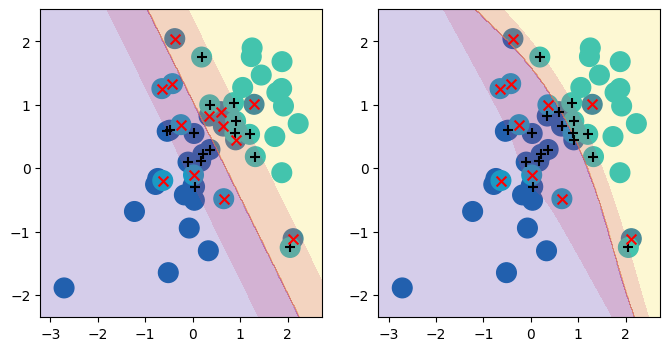

In [3]:
# Assume tuning parameter C=10
svm_linear = SVC(C=10, kernel="linear")
svm_linear.fit(X, y)
svm_nonlinear = SVC(C=10, kernel="poly")
svm_nonlinear.fit(X, y)

# Plot linear and non-linear decision boundaries
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4))
plot_svm(X, y, svm_linear, ax=ax1)
plot_svm(X, y, svm_nonlinear, ax=ax2)

# Plot confusion matrix on testing data
X_test = rng.standard_normal((50, 2))
y_test = np.array([-1] * 25 + [1] * 25)
X_test[y_test==1] += 1

linear_y_test_hat = svm_linear.predict(X_test)
nonlinear_y_test_hat = svm_nonlinear.predict(X_test)
print(f"Confusion table for linear decision boundary: \n{confusion_table(linear_y_test_hat, y_test)}")
print(f"Confusion table for non-linear decision boundary: \n{confusion_table(nonlinear_y_test_hat, y_test)}")

<b> Q5 </b>

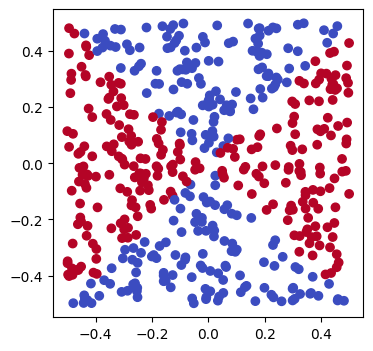

In [4]:
# 5a-b
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500)- 0.5
x2 = rng.uniform(size=500)- 0.5
y = x1**2- x2**2 > 0

fig, ax = subplots(figsize=(4, 4))
ax.scatter(x=x1, y=x2, c=y, cmap=cm.coolwarm);

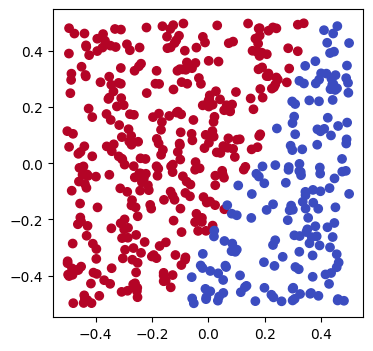

In [40]:
# 5c
df5 = pd.DataFrame({"X1":x1, "X2":x2, "y":y})
model5c = LogisticRegression()
model5c.fit(X=df5[["X1", "X2"]], y=df5["y"])

# 5d
ypred5c = model5c.predict(df5[["X1", "X2"]])
fig, ax = subplots(figsize=(4, 4))
ax.scatter(x=x1, y=x2, c=ypred5c, cmap=cm.coolwarm);

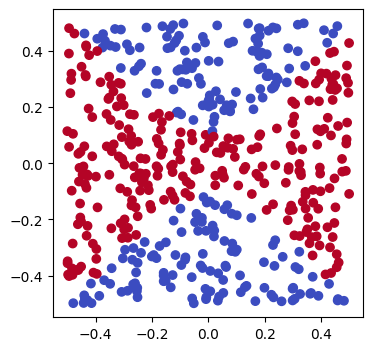

In [41]:
# 5e-f (Adding interaction and quadratic terms)
df5["X1sq"] = df5["X1"]**2
df5["X2sq"] = df5["X2"]**2
df5["X1X2"] = df5["X1"]*df5["X2"]

model5e = LogisticRegression()
model5e.fit(X=df5[["X1", "X2", "X1sq", "X2sq", "X1X2"]], y=df5["y"])
ypred5e = model5e.predict(df5[["X1", "X2", "X1sq", "X2sq", "X1X2"]])
fig, ax = subplots(figsize=(4, 4))
ax.scatter(x=x1, y=x2, c=ypred5e, cmap=cm.coolwarm);

c:\Users\winso\OneDrive\Desktop\GitHub\ISL-Python\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\winso\OneDrive\Desktop\GitHub\ISL-Python\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\winso\OneDrive\Desktop\GitHub\ISL-Python\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


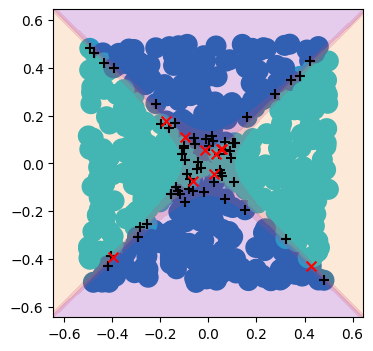

In [ ]:
# 5g-h
svm_nonlinear = SVC(C=10, kernel="poly", degree=2)
svm_nonlinear.fit(X=df5[["X1", "X2"]], y=df5["y"])
fig, ax = subplots(figsize=(4, 4))
plot_svm(df5[["X1", "X2"]], df5["y"], svm_nonlinear, ax=ax);

In [44]:
# 5i
print(f"Confusion table for linear logistic regression: \n{confusion_table(ypred5c, y)}")
print("------")
print(f"Confusion table for non-linear logistic regression: \n{confusion_table(ypred5e, y)}")
print("------")
print(f"Confusion table for non-linear SVC: \n{confusion_table(svm_nonlinear.predict(df5[["X1", "X2"]]), y)}")

Confusion table for linear logistic regression: 
Truth      False  True 
Predicted              
False         63    101
True         184    152
------
Confusion table for non-linear logistic regression: 
Truth      False  True 
Predicted              
False        227      1
True          20    252
------
Confusion table for non-linear SVC: 
Truth      False  True 
Predicted              
False        238      1
True           9    252


<b> Q6 </b>

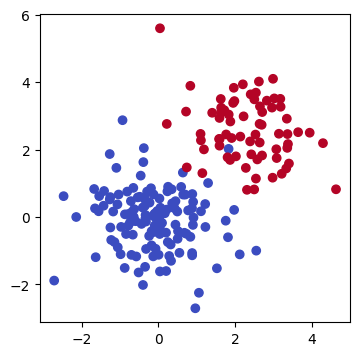

In [68]:
# 6a
rng = np.random.default_rng(1)
X = rng.standard_normal((200, 2))
y = np.array([-1] * 130 + [1] * 70)
X[y==1] += 2.5
fig, ax = subplots(figsize=(4, 4))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm);

In [81]:
# 6b
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(C=c, kernel="linear")
    svm.fit(X, y)
    errors = sum(np.where(svm.predict(X)!=y, 1, 0))
    print(f"For C = {c}, number of mispredictions = {errors}")

For C = 0.001, number of mispredictions = 65
For C = 0.01, number of mispredictions = 3
For C = 0.1, number of mispredictions = 3
For C = 1, number of mispredictions = 3
For C = 10, number of mispredictions = 3
For C = 100, number of mispredictions = 3


In [83]:
# 6c-d
X = rng.standard_normal((200, 2))
ytrain = np.array([-1] * 130 + [1] * 70)
X[ytrain==1] += 2.5
ytest =  np.array([-1] * 120 + [1] * 80)

for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(C=c, kernel="linear")
    svm.fit(X, ytrain)
    errors = sum(np.where(svm.predict(X)!=ytest, 1, 0))
    print(f"For C = {c}, number of mispredictions = {errors}")

For C = 0.001, number of mispredictions = 73
For C = 0.01, number of mispredictions = 16
For C = 0.1, number of mispredictions = 14
For C = 1, number of mispredictions = 15
For C = 10, number of mispredictions = 15
For C = 100, number of mispredictions = 15


<b> Q7 </b>

In [225]:
# 7a
df7 = pd.read_csv("Data/Auto.csv")

# Data wrangling
df7 = df7[df7["horsepower"] != "?"].reset_index(drop=True)
discrete_var = ["cylinders", "origin"]
continuous_var = df7.columns.drop(discrete_var).drop(["mpg", "name"])
cont_df7 = pd.DataFrame(StandardScaler().fit_transform(df7[continuous_var]), columns=continuous_var)
dis_df7 = df7[discrete_var]
df7 = pd.concat([df7["mpg"], cont_df7, dis_df7], axis=1).reset_index(drop=True)

mpg_binary = np.where(df7["mpg"] > np.median(df7["mpg"]), 1, 0)

In [232]:
# 7b
svm7b = SVC(C=0.01, kernel="linear")
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm7b, {'C':[0.01, 0.1, 1, 10]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(df7.iloc[:, 1:-1], mpg_binary)
print(f"Cross validation errors: {1 - grid.cv_results_[("mean_test_score")]}")
print(grid.best_params_)

Cross validation errors: [0.09944823 0.09944823 0.08666018 0.09178838]
{'C': 1}


In [234]:
# 7c
svm7c1 = SVC(C=0.01, kernel="rbf")
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm7c1, {'C':[0.01, 0.1, 1, 10],
                                 'gamma':[0.5,1,2,3,4]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(df7.iloc[:, 1:-1], mpg_binary)
print(f"Cross validation errors: {1 - grid.cv_results_[("mean_test_score")]}")
print(grid.best_params_)
print("--------")

svm7c2 = SVC(C=0.01, kernel="poly")
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm7c2, {'C':[0.01, 0.1, 1, 10],
                                'degree':[2,3,4,5,6]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(df7.iloc[:, 1:-1], mpg_binary)
print(f"Cross validation errors: {1 - grid.cv_results_[("mean_test_score")]}")
print(grid.best_params_)

Cross validation errors: [0.56893866 0.56893866 0.56893866 0.56893866 0.56893866 0.09944823
 0.09944823 0.13774748 0.27052905 0.45170399 0.08409607 0.07137293
 0.06121389 0.06630964 0.07653359 0.05858488 0.06364817 0.07134047
 0.08159688 0.08412853]
{'C': 10, 'gamma': 0.5}
--------
Cross validation errors: [0.2526777  0.2526777  0.2526777  0.2526777  0.2526777  0.09688413
 0.09688413 0.09688413 0.09688413 0.09944823 0.09688413 0.09688413
 0.09432003 0.09691659 0.0944174  0.07903278 0.08416099 0.08675755
 0.08412853 0.08412853]
{'C': 10, 'degree': 2}


<b> Q8 </b>

In [175]:
# 8a
df8 = pd.read_csv("Data/OJ.csv")

# Data wrangling
df8["Store7"] = np.where(df8["Store7"]=="No", 0, 1)
discrete_var = ["StoreID", "SpecialCH", "SpecialMM", "Store7", "STORE"]
continuous_var = df8.columns.drop(discrete_var).drop("Purchase")
cont_df8 = pd.DataFrame(StandardScaler().fit_transform(df8[continuous_var]), columns=continuous_var)
dis_df8 = df8[discrete_var]
df8 = pd.concat([df8["Purchase"], cont_df8, dis_df8], axis=1).reset_index(drop=True)

train = df8.iloc[:800]
test = df8.iloc[800:]

In [176]:
# 8b
svm8b = SVC(C=0.01, kernel="linear")
svm8b.fit(X=train.iloc[:, 1:], y=train["Purchase"]).n_support_

array([210, 211], dtype=int32)

In [185]:
# 8c
print(f"Training error: {1-svm8b.score(train.iloc[:, 1:], train["Purchase"])}")
print(f"Test error: {1-svm8b.score(test.iloc[:, 1:], test["Purchase"])}")

Training error: 0.15625
Test error: 0.2148148148148148


In [187]:
# 8d
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm8b, {'C':[0.01, 0.1, 1, 10]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(train.iloc[:, 1:], train["Purchase"])
grid.best_params_

{'C': 10}

In [190]:
# 8e
svm8e = SVC(C=10, kernel="linear")
svm8e.fit(X=train.iloc[:, 1:], y=train["Purchase"])
print(f"Training error: {1-svm8e.score(train.iloc[:, 1:], train["Purchase"])}")
print(f"Test error: {1-svm8e.score(test.iloc[:, 1:], test["Purchase"])}")

Training error: 0.14875000000000005
Test error: 0.20370370370370372


In [198]:
# 8f
svm8f = SVC(C=0.01, kernel="rbf")
svm8f.fit(X=train.iloc[:, 1:], y=train["Purchase"])
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm8f, {'C':[0.01, 0.1, 1, 10]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(train.iloc[:, 1:], train["Purchase"])
print(grid.best_params_)

svm8f = SVC(C=1, kernel="rbf")
svm8f.fit(X=train.iloc[:, 1:], y=train["Purchase"])
print(f"Training error: {1-svm8f.score(train.iloc[:, 1:], train["Purchase"])}")
print(f"Test error: {1-svm8f.score(test.iloc[:, 1:], test["Purchase"])}")

{'C': 1}
Training error: 0.14625
Test error: 0.1703703703703704


In [199]:
# 8g
svm8g = SVC(C=0.01, kernel="poly", degree=2)
svm8g.fit(X=train.iloc[:, 1:], y=train["Purchase"])
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm8g, {'C':[0.01, 0.1, 1, 10]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy');
grid.fit(train.iloc[:, 1:], train["Purchase"])
print(grid.best_params_)

svm8g = SVC(C=1, kernel="poly")
svm8g.fit(X=train.iloc[:, 1:], y=train["Purchase"])
print(f"Training error: {1-svm8g.score(train.iloc[:, 1:], train["Purchase"])}")
print(f"Test error: {1-svm8g.score(test.iloc[:, 1:], test["Purchase"])}")

{'C': 1}
Training error: 0.18125000000000002
Test error: 0.22962962962962963
